In [23]:
import numpy as np 
import matplotlib.pyplot as plt 
import random
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [3]:
x_train = np.loadtxt("input.csv", delimiter=",")
y_train = np.loadtxt("labels.csv", delimiter=",")

x_test = np.loadtxt("input_test.csv", delimiter=",")
y_test = np.loadtxt("labels_test.csv", delimiter=",")



In [12]:
x_train = x_train.reshape(len(x_train), 100,100,3)
y_train = y_train.reshape(len(y_train),1)

x_test = x_test.reshape(len(x_test), 100,100,3)
y_test = y_test.reshape(len(y_test),1)

x_train =  x_train/255.0
x_test = x_test/255.0

In [13]:
print("SHape of x_train= ", x_train.shape)
print("SHape of y_train= ", y_train.shape)

print("SHape of x_test= ", x_test.shape)
print("SHape of y_test= ", y_test.shape)

SHape of x_train=  (2000, 100, 100, 3)
SHape of y_train=  (2000, 1)
SHape of x_test=  (400, 100, 100, 3)
SHape of y_test=  (400, 1)


In [14]:
x_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

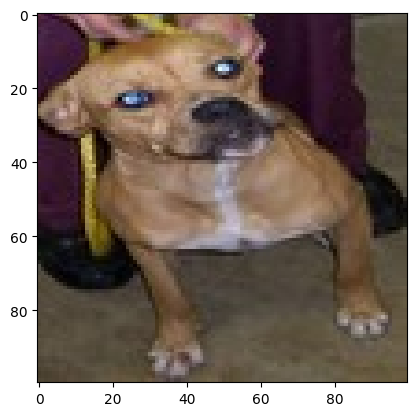

In [18]:
# to show a picture 
index = random.randint(0 , len(x_train))
plt.imshow(x_train[index, :])

In [38]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation="relu", input_shape= (100,100,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [39]:

# opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss = 'binary_crossentropy', optimizer= "adam", metrics = ['accuracy'])

In [41]:
model.fit(x_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
32/32 [==============================] - 21s 642ms/step - loss: 0.4407 - accuracy: 0.7905
Epoch 2/10
32/32 [==============================] - 20s 624ms/step - loss: 0.3704 - accuracy: 0.8310
Epoch 3/10
32/32 [==============================] - 20s 624ms/step - loss: 0.2739 - accuracy: 0.8920
Epoch 4/10
32/32 [==============================] - 20s 618ms/step - loss: 0.2071 - accuracy: 0.9240
Epoch 5/10
32/32 [==============================] - 20s 619ms/step - loss: 0.1403 - accuracy: 0.9605
Epoch 6/10
32/32 [==============================] - 20s 617ms/step - loss: 0.0927 - accuracy: 0.9770
Epoch 7/10
32/32 [==============================] - 20s 621ms/step - loss: 0.0616 - accuracy: 0.9870
Epoch 8/10
32/32 [==============================] - 20s 624ms/step - loss: 0.0302 - accuracy: 0.9970
Epoch 9/10
32/32 [==============================] - 20s 620ms/step - loss: 0.0197 - accuracy: 0.9985
Epoch 10/10
32/32 [==============================] - 20s 623ms/step - loss: 0.0115 - accura

In [42]:
model.evaluate(x_test, y_test)

13/13 [==============================] - 4s 85ms/step - loss: 1.3574 - accuracy: 0.6775


[1.3574495315551758, 0.6775000095367432]

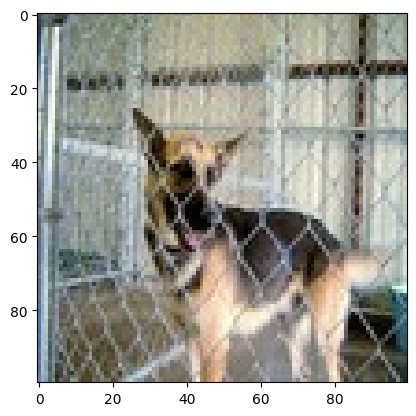

1/1 [==============================] - 0s 31ms/step
[[0.00546788]]


In [60]:
# Prediction
index2 = random.randint(0 , len(x_test))
plt.imshow(x_test[index2, :])
plt.show()

y_pred= model.predict(x_test [index2, :].reshape(1,100,100,3))
print(y_pred)

y_pred = y_pred > 0.5

if ( y_pred == 0):
    pred ='Dog'
else:
    pred = 'Cat'

    print ("Our Model is = ", pred)
    